In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
import tensorflow as tf
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')


# Set the path to the root directory
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(path)


# Load multiple prediction files
df1 = pd.read_csv(path + '/data/predictions/10.csv')
df2 = pd.read_csv(path + '/data/predictions/11.csv')
df3 = pd.read_csv(path + '/data/predictions/12.csv')


# Print the first and last Quote_date for each dataframe
print("First Quote_date for df1: ", df1["Quote_date"].iloc[0])
print("Last Quote_date for df1: ", df1["Quote_date"].iloc[-1])
print("First Quote_date for df2: ", df2["Quote_date"].iloc[0])
print("Last Quote_date for df2: ", df2["Quote_date"].iloc[-1])
print("First Quote_date for df3: ", df3["Quote_date"].iloc[0])
print("Last Quote_date for df3: ", df3["Quote_date"].iloc[-1])

# Print the length of each dataframe
print("Length of df1: ", len(df1))
print("Length of df2: ", len(df2))
print("Length of df3: ", len(df3))

# In df1, change "Predictions" column name to Model 1
df1 = df1.rename(columns={"Prediction": "Model 1"})
# In df2, change "Predictions" column name to Model 2
df2 = df2.rename(columns={"Prediction": "Model 2"})
# In df3, change "Predictions" column name to Model 3
df3 = df3.rename(columns={"Prediction": "Model 3"})


# Merge the dataframes
df = pd.concat([df1, df2["Model 2"], df3["Model 3"]], axis=1)

First Quote_date for df1:  2017-12-22
Last Quote_date for df1:  2018-06-05
First Quote_date for df2:  2017-12-22
Last Quote_date for df2:  2018-06-05
First Quote_date for df3:  2017-12-22
Last Quote_date for df3:  2018-06-05
Length of df1:  528631
Length of df2:  528631
Length of df3:  528631


# Overall RMSE

In [130]:
# Print the RMSE for each model
print("RMSE for Base: ", np.sqrt(np.mean((df['Model 1'] - df['Price'])**2)))
print("RMSE for Model load: ", np.sqrt(np.mean((df['Model 2'] - df['Price'])**2)))
print("RMSE for BN_momentum = 0.7: ", np.sqrt(np.mean((df['Model 3'] - df['Price'])**2)))

RMSE for Base:  9.450555198374097
RMSE for Model load:  28.168534693172045
RMSE for BN_momentum = 0.7:  8.311411072486372


In [131]:
display(df)

,Unnamed: 0,Quote_date,Price,Model 1,Underlying_last,Strike,TTM,R,Model 2,Model 3
0,3134913,2017-12-22,1083.045,1083.945100,2683.72,1600.0,4,1.15,1083.085800,1083.672000
1,3134914,2017-12-22,983.050,984.420700,2683.72,1700.0,4,1.15,983.443500,983.439100
2,3134915,2017-12-22,933.045,934.681150,2683.72,1750.0,4,1.15,933.781740,933.258100
3,3134916,2017-12-22,883.050,884.760600,2683.72,1800.0,4,1.15,883.969060,883.086500
4,3134917,2017-12-22,833.050,834.762200,2683.72,1850.0,4,1.15,834.021200,832.966430
...,...,...,...,...,...,...,...,...,...,...
528626,3654063,2018-06-05,39.105,49.193050,2749.21,3175.0,563,2.49,38.084538,47.090874
528627,3654064,2018-06-05,33.945,43.672470,2749.21,3200.0,563,2.49,32.823547,41.340645
528628,3654065,2018-06-05,25.300,35.028960,2749.21,3250.0,563,2.49,22.634212,31.869450
528629,3654066,2018-06-05,18.255,27.627901,2749.21,3300.0,563,2.49,0.000000,24.579248


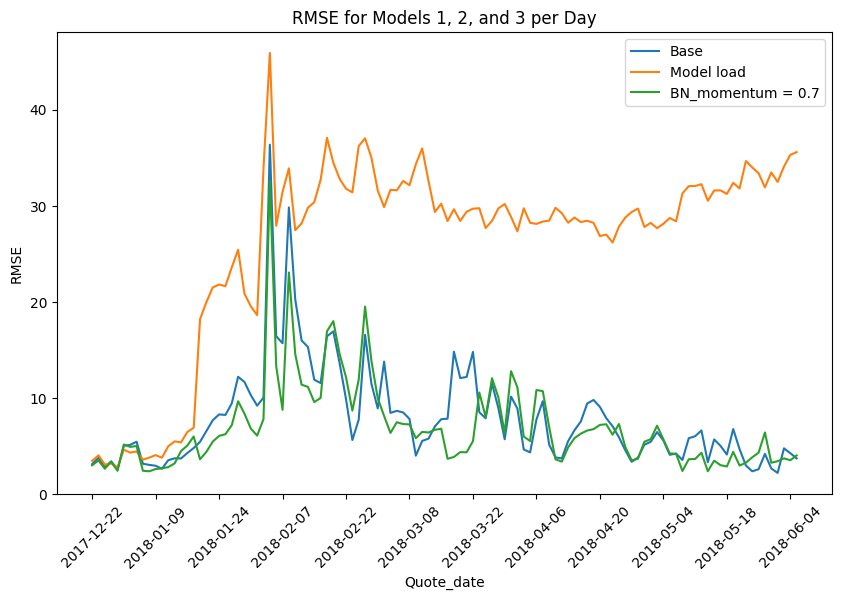

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.metrics import mean_squared_error

# Define a function to calculate RMSE
def calculate_rmse(group):
    rmse_model_1 = np.sqrt(mean_squared_error(group["Price"], group["Model 1"]))
    rmse_model_2 = np.sqrt(mean_squared_error(group["Price"], group["Model 2"]))
    rmse_model_3 = np.sqrt(mean_squared_error(group["Price"], group["Model 3"]))
    return pd.Series({"RMSE_Model_1": rmse_model_1, "RMSE_Model_2": rmse_model_2, "RMSE_Model_3": rmse_model_3})

# Group data by Quote_date and calculate RMSE for each group
rmse_df = df.groupby("Quote_date").apply(calculate_rmse).reset_index()

# Plot the RMSE values for each model
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=rmse_df, x="Quote_date", y="RMSE_Model_1", label="Base", ax=ax)
sns.lineplot(data=rmse_df, x="Quote_date", y="RMSE_Model_2", label="Model load", ax=ax)
sns.lineplot(data=rmse_df, x="Quote_date", y="RMSE_Model_3", label="BN_momentum = 0.7", ax=ax)


# Set the interval for x-axis labels
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

plt.xlabel("Quote_date")
plt.ylabel("RMSE")
plt.title("RMSE for Models 1, 2, and 3 per Day")
plt.legend()
plt.xticks(rotation=45)
plt.show()


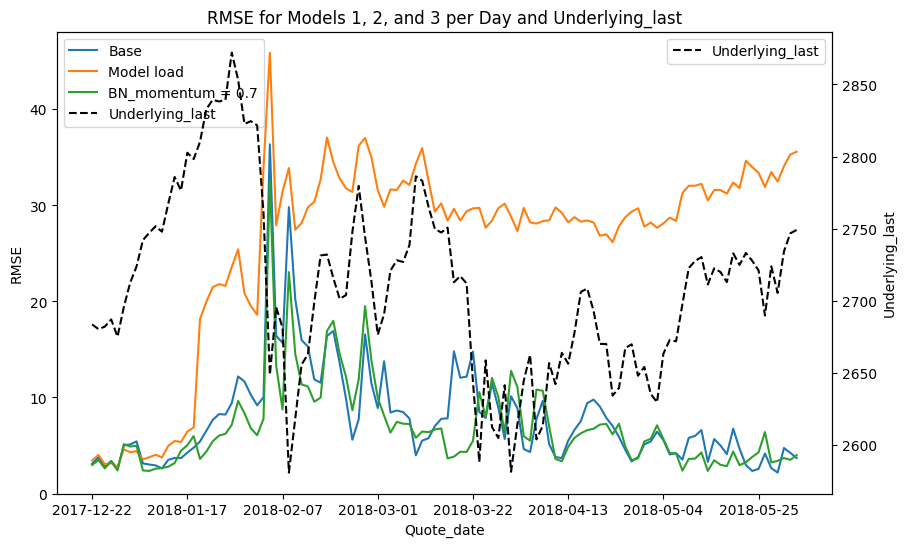

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.metrics import mean_squared_error

# Define a function to calculate RMSE
def calculate_rmse(group):
    rmse_model_1 = np.sqrt(mean_squared_error(group["Price"], group["Model 1"]))
    rmse_model_2 = np.sqrt(mean_squared_error(group["Price"], group["Model 2"]))
    rmse_model_3 = np.sqrt(mean_squared_error(group["Price"], group["Model 3"]))
    return pd.Series({"RMSE_Model_1": rmse_model_1, "RMSE_Model_2": rmse_model_2, "RMSE_Model_3": rmse_model_3})

# Group data by Quote_date and calculate RMSE for each group
rmse_df = df.groupby("Quote_date").apply(calculate_rmse).reset_index()

# Create a new column in rmse_df with the mean Underlying_last value for each Quote_date
rmse_df["Underlying_last"] = df.groupby("Quote_date")["Underlying_last"].mean().values

# Plot the RMSE values for each model
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=rmse_df, x="Quote_date", y="RMSE_Model_1", label="Base", ax=ax)
sns.lineplot(data=rmse_df, x="Quote_date", y="RMSE_Model_2", label="Model load", ax=ax)
sns.lineplot(data=rmse_df, x="Quote_date", y="RMSE_Model_3", label="BN_momentum = 0.7", ax=ax)

# Set the interval for x-axis labels
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=15))

# Create a second y-axis for Underlying_last values
ax2 = ax.twinx()
sns.lineplot(data=rmse_df, x="Quote_date", y="Underlying_last", label="Underlying_last", color="black", ax=ax2, linestyle="--")

# Set the labels and title
ax.set_xlabel("Quote_date")
ax.set_ylabel("RMSE")
ax2.set_ylabel("Underlying_last")
plt.title("RMSE for Models 1, 2, and 3 per Day and Underlying_last")

# Combine the legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc="upper left")

plt.xticks(rotation=30)
plt.show()


### TTM

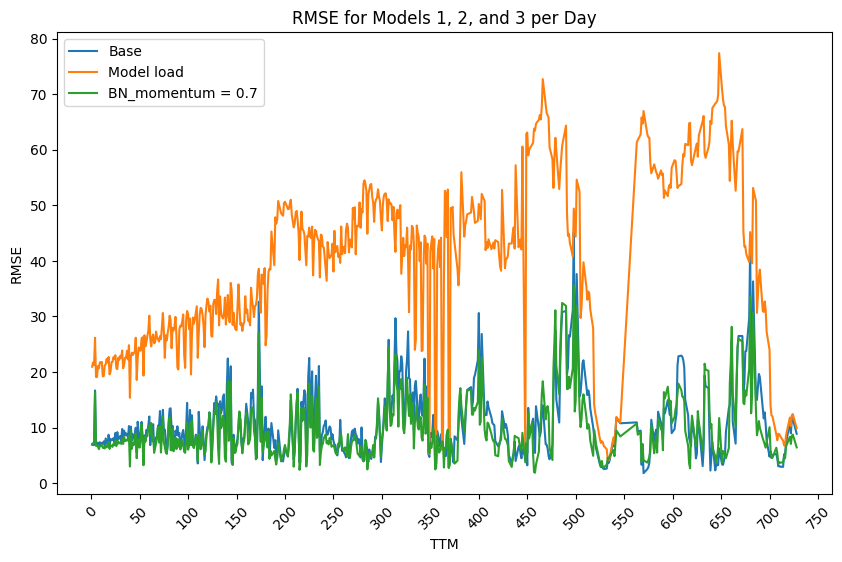

In [134]:
# Group data by Quote_date and calculate RMSE for each group
rmse_df = df.groupby("TTM").apply(calculate_rmse).reset_index()


# Plot the RMSE values for each model
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=rmse_df, x="TTM", y="RMSE_Model_1", label="Base", ax=ax)
sns.lineplot(data=rmse_df, x="TTM", y="RMSE_Model_2", label="Model load", ax=ax)
sns.lineplot(data=rmse_df, x="TTM", y="RMSE_Model_3", label="BN_momentum = 0.7", ax=ax)


# Set the interval for x-axis labels
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=50))


plt.xlabel("TTM")
plt.ylabel("RMSE")
plt.title("RMSE for Models 1, 2, and 3 per Day")
plt.legend()
plt.xticks(rotation=45)
plt.show()

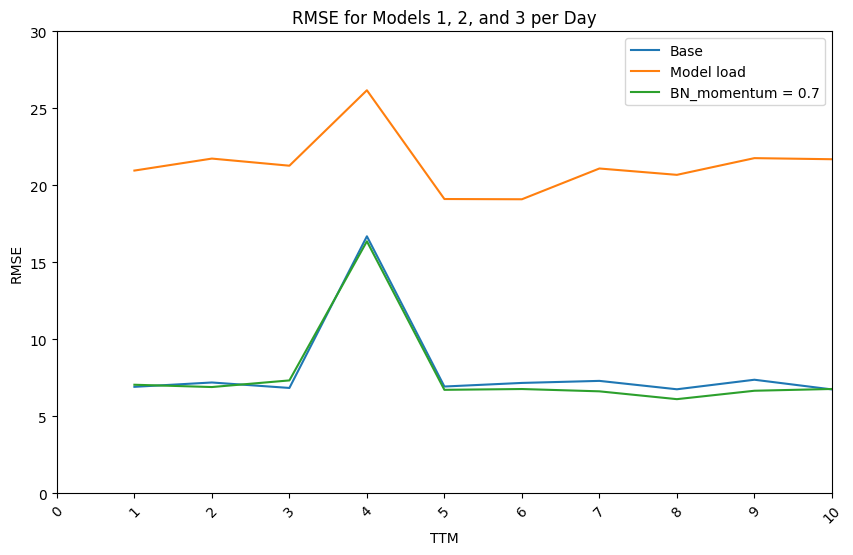

In [135]:
# Group data by Quote_date and calculate RMSE for each group
rmse_df = df.groupby("TTM").apply(calculate_rmse).reset_index()

# Plot the RMSE values for each model
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=rmse_df, x="TTM", y="RMSE_Model_1", label="Base", ax=ax)
sns.lineplot(data=rmse_df, x="TTM", y="RMSE_Model_2", label="Model load", ax=ax)
sns.lineplot(data=rmse_df, x="TTM", y="RMSE_Model_3", label="BN_momentum = 0.7", ax=ax)


# Set the interval for x-axis labels
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))

# Set the interval for x-axis to 0-10
plt.xlim(0, 10)
plt.ylim(0, 30)

plt.xlabel("TTM")
plt.ylabel("RMSE")
plt.title("RMSE for Models 1, 2, and 3 per Day")
plt.legend()
plt.xticks(rotation=45)
plt.show()

### Moneyness

In [136]:
# Add moneyness
df["Moneyness"] = df["Underlying_last"] / df["Strike"]

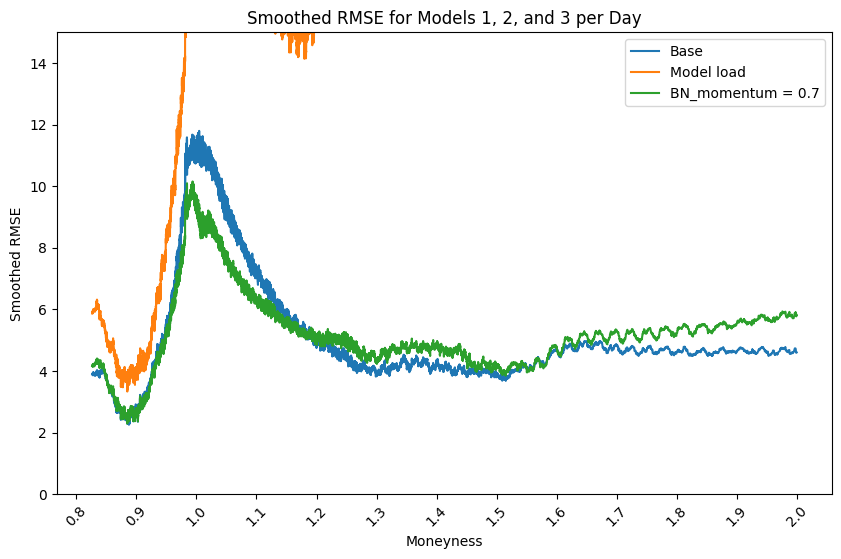

In [137]:
# Group data by Moneyness and calculate RMSE for each group
rmse_df = df.groupby("Moneyness").apply(calculate_rmse).reset_index()

# Define the rolling mean window size
window_size = 200

# Apply rolling mean to the RMSE values
rmse_df["RMSE_Model_1_smooth"] = rmse_df["RMSE_Model_1"].rolling(window=window_size).mean()
rmse_df["RMSE_Model_2_smooth"] = rmse_df["RMSE_Model_2"].rolling(window=window_size).mean()
rmse_df["RMSE_Model_3_smooth"] = rmse_df["RMSE_Model_3"].rolling(window=window_size).mean()

# Plot the smoothed RMSE values for each model
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=rmse_df, x="Moneyness", y="RMSE_Model_1_smooth", label="Base", ax=ax)
sns.lineplot(data=rmse_df, x="Moneyness", y="RMSE_Model_2_smooth", label="Model load", ax=ax)
sns.lineplot(data=rmse_df, x="Moneyness", y="RMSE_Model_3_smooth", label="BN_momentum = 0.7", ax=ax)

# Set the interval for x-axis labels
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))

plt.ylim(0,15)

plt.xlabel("Moneyness")
plt.ylabel("Smoothed RMSE")
plt.title("Smoothed RMSE for Models 1, 2, and 3 per Day")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Tabel

In [138]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Assuming df is a DataFrame with the required columns

df_low_money = df[df["Underlying_last"] / df["Strike"] < 0.97]
df_low_money.name = "<0.97"
df_mid_money = df[(df["Underlying_last"] / df["Strike"]).between(0.97, 1.03, inclusive=True)]
df_mid_money.name = "0.97-1.03"
df_high_money = df[df["Underlying_last"] / df["Strike"] > 1.03]
df_high_money.name = ">1.03"

df_table = pd.DataFrame(columns=['Moneyness', 'Maturity', 'Model 1', 'Model 2', 'Model 3'])
maturity_intervals = [(0, 10), (10, 30), (30, 90), (90, 300), (300, 730)]

for dataframe in [df_low_money, df_mid_money, df_high_money]:
    for start, end in maturity_intervals:
        df_temp = dataframe[(dataframe["TTM"]).between(start, end, inclusive=True)]
        model_1 = np.sqrt(tf.keras.metrics.mean_squared_error(df_temp["Price"], df_temp["Model 1"]))
        model_2 = np.sqrt(tf.keras.metrics.mean_squared_error(df_temp["Price"], df_temp["Model 2"]))
        model_3 = np.sqrt(tf.keras.metrics.mean_squared_error(df_temp["Price"], df_temp["Model 3"]))
        df_table.loc[len(df_table.index)] = [dataframe.name, f"{start}-{end}", model_1, model_2, model_3]

# Write to file
df_table.to_csv('RMSE_result_table_3_ML_models.csv', encoding='utf-8', index=False)

with open('results.tex', 'w') as tf:
     tf.write(df_table.to_latex())
